# ETAPA I

*   Nome: Anthony César Menegasso Menezes
*   Matrícula: 2482837

## DEFINIÇÃO DO TEMA

Como muito bem resumido no portal do investidor: Ação é a menor parcela do capital social das companhias ou sociedades anônimas. É, portanto, um título patrimonial e, como tal, concede aos seus titulares, os acionistas, todos os direitos e deveres de um sócio, no limite das ações possuídas. Entretanto, estas ações, negociadas nas bolsas de valores ao redor do mundo fazem parte da chamada renda variável, ou seja, seu valor esta submetido a variações ao longo do tempo.

Os desafios na tratativa deste tema são muitas. Como as ações estão ligadas diretamente às empresas que por sua vez estão ligadas ao cenário global uma abordagem simplista pode nos trazer valores/previsões errôneas. A situação atual, a evolução ao longo do tempo, o histórico de dividendos e a própria reputação da empresa são exemplos de variáveis que podem vir a influenciar a cotação de determinada ação. Neste projeto, o foco será a análise de valores quantitativos, como os preços mínimos, fechamento e máximos ao longo da vida da empresa escolhida, logo, informações qualitativas das bases de dados deverão ser processadas e desconsideradas da análise neste momento.

## OBJETIVO E ESPECIFICAÇÕES TÉCNICAS

A partir de dados históricos sobre os preços e variações de determinada ação, busca-se modelar uma rede neural artificial do tipo LSTM que possa tentar prever qual os valores a serem alcançados num determinado número de dias subsequentes. 
Para que isso seja possível, são várias as considerações, dado que uma regressão linear simples por exemplo não consideraria todos os nuances que envolvem a variação nos preços; Explicações mais específicas acerca da lógica que o código se baseeou podem ser encontradas no pdf disponível no github.

Algumas observações sobre os tipos de dados utilizados são:

1. Campos da base de dados:

  1.1 date: data do valor em questão (é o índice)	

  1.2 close: valor de fechamento numa data específica

  1.3 high: valor máximo alcançado numa data específica

  1.4 low: valor minimo alcançado numa data específica

  1.5 open: valor de abertura numa data específica


2. Metódo de machine learning utilizado

Como muito bem resumido na Wikepedia a memória de longo prazo (LSTM) é uma rede neural artificial usada nas áreas de inteligência artificial e aprendizado profundo. Ao contrário das redes neurais feedforward padrão, o LSTM possui conexões de feedback. Essa rede neural recorrente pode processar não apenas pontos de dados únicos (como imagens), mas também sequências inteiras de dados (como fala ou vídeo). Neste projeto, essa funcionalidade de "feedback" será utilizada para considerar valores em períodos anteriores na analise.


3. Divisão da base

A base de dados nesse projeto terá 3 partes principais, sendo elas:

1. Parcela de treinamento (70% dos valores que foram carregados)
2. Parcela de validação (30% dos valores que foram carregados)
3. Parcela da previsão (30 dias além da última data disponível na base)


4. Métricas

Além da comparação gráfica dos outputs que serão o principal feedback do desempenho do modelo será utilizado o Erro quadrático médio, que medirá a média dos quadrados dos erros, ou seja, a diferença média quadrática entre os valores estimados e o valor real.






# ETAPA II

## BIBLIOTECAS A SEREM UTILIZADAS

In [ ]:
#Importação das bibliotecas a serem utilizadas na análise
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import tensorflow as tf

##CONEXÃO COM O DATASET


Para o upload do dataset a ser utilizado para treinar o modelo e nos fornecer os dados para a predição existem duas opções:
1. Baixar um arquivo .csv com o histórico necessário. Para esta opção recomenda-se o site do "Yahoo finanças": https://finance.yahoo.com/quote/MMM/history?p=MMM
2. Automatizar esse processo de obtenção dos dados partir de uma API, garantido que sempre se está trabalhando com os dados mais atualizados. Para essa opção a fonte proposta é o site "Tiingo Stock Market Tools": https://www.tiingo.com/mmm/overview

Para este trabalho, se optou por utilizar a opção número 2.

Ao se cadastrar no site Tiingo, ele disponibilizará uma chave de autenticação para download dos dados. Por questões de privacidade e segurança minha chave pessoal não estará listada abaixo.Entretanto, para utilização do modelo de predição, basta substituir:
1. O texto entre " " pela chave fornecida no site.
2. O código da ação entre ' ' pela que se deseja analisar.

In [ ]:
#A empresa escolhida para essa análise foi a 3M, de código MMM. Qualquer outra poderia ter sido escolhida.
key="ADICIONE A KEY"
df = pdr.get_data_tiingo('MMM', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
#Aqui estamos transformando a base de dados do formato csv para um pandas dataframe
df.to_csv('MMM.csv')
df=pd.read_csv('MMM.csv')

##EXIBIÇÃO DE TRECHOS NOS DADOS

Nesta etapa iremos garantir se o dataframes da ação desejada foi carregada de forma correta com as informações que necessitamos.

In [ ]:
#Para visualizarmos as 5 primeiras linhas
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MMM,2017-05-23 00:00:00+00:00,197.73,198.97,197.5200,198.73,1514189,168.721288,169.779369,168.542097,169.574579,1514189,0.0,1.0
1,MMM,2017-05-24 00:00:00+00:00,197.49,198.53,197.2800,198.49,1206374,168.516498,169.403921,168.337307,169.369789,1206374,0.0,1.0
2,MMM,2017-05-25 00:00:00+00:00,199.54,199.61,197.7500,198.41,1460317,170.265745,170.325475,168.738354,169.301526,1460317,0.0,1.0
3,MMM,2017-05-26 00:00:00+00:00,200.67,200.69,198.9722,199.14,1409579,171.229964,171.247030,169.781246,169.924429,1409579,0.0,1.0
4,MMM,2017-05-30 00:00:00+00:00,202.44,203.03,199.9600,200.31,2168167,172.740290,173.243732,170.624127,170.922779,2168167,0.0,1.0


In [ ]:
#Para visualizarmos as 5 últimas linhas
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,MMM,2022-05-16 00:00:00+00:00,150.50,150.83,146.305,149.22,2713786,148.989424,149.316112,144.836529,147.722271,2713786,0.00,1.0
1255,MMM,2022-05-17 00:00:00+00:00,152.34,152.50,150.520,151.99,2106776,150.810956,150.969350,149.009223,150.464469,2106776,0.00,1.0
1256,MMM,2022-05-18 00:00:00+00:00,148.93,151.71,148.470,151.59,2958657,147.435182,150.187279,146.979799,150.068484,2958657,0.00,1.0
1257,MMM,2022-05-19 00:00:00+00:00,146.96,148.90,144.110,146.20,2746664,146.960000,148.900000,144.110000,146.200000,2746664,1.49,1.0
1258,MMM,2022-05-20 00:00:00+00:00,143.83,147.94,141.090,147.54,4195356,143.830000,147.940000,141.090000,147.540000,4195356,0.00,1.0


##MÉTODOS DE PRÉ-PROCESSAMENTO

Como a ideia é prever os preços que os dias subsequentes fecharão a cotação, nos interessa principalmente 3 colunas da base de dados. 
Estas colunas são :
1. Close : Indica o preço em que a ação fechou o dia
2. High : Indica o preço máximo que a ação chegou no dia
3. Low : Indica o preço minimo que a ação chegou no dia

Para o treinamento deste modelo, cujo objetivo é prever um preço adequado para uma ordem de venda, será utilizado o histórico dos maiores preços alcançados ao longo do tempo.

(1259,)

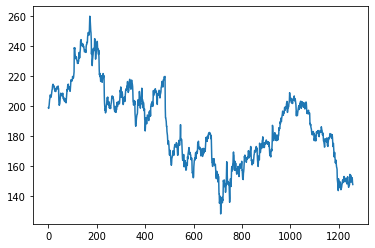

In [ ]:
## Como nos interessa apenas o preço máximo, criaremos um dataframe apenas com essa informação e o índice, que representará o dia.
df1=df.reset_index()['high']
plt.plot(df1) #Evolução da cotação ao longo do período
df1.shape #Número de dias sendo considerado

In [ ]:
#O método escolhido, no caso o LSTM é bastante sensível a variação. Por isso é necessário que adicionemos a função Scaler: mín e max para os valores da cotação.
#Essa função transformará nosso dataframe em valores entre 0 e 1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1259, 1)

In [ ]:
df1 #visualização da transformação feita acima

array([[0.53718505],
       [0.53383573],
       [0.54205679],
       ...,
       [0.17743777],
       [0.1560478 ],
       [0.1487402 ]])

##PARTICIONAMENTO DOS DADOS

Para que possamos treinar o modelo, precisamos dividir a base de dados a qual foi feita o upload em 2 partes, as quais são:

1. Treino: Aproximadamente 70% do banco de dados
2. Validação: Aproxidamente 30% do banco de dados

OBS: A ideia desse modelo é tentar prever dados futuros a partir do histórico conhecido, por isso não temos aqui a etapa de teste.

In [ ]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size #aqui podemos verificar quantos dias ficaram em cada uma das partes

(881, 378)

##TREINAMENTO DO MODELO

A ideia aqui é se utilizar de matrizes para podermos considerar as séries temporais, conforme exemplificado no pdf disponível no github. A lógica por trás desse trecho foi também baseada em exemplos disponíveis na internet, as quais cabe destacar.

Time Series Forecasting With RNN(LSTM)| Complete Python Tutorial|: 
https://www.youtube.com/watch?v=S8tpSG6Q2H0

PyTorch Time Sequence Prediction With LSTM - Forecasting Tutorial: 
https://www.youtube.com/watch?v=AvKSPZ7oyVg


In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

Para o caso específico do metódo LSTM, é necessário remodelarmos os imputs para:
1. Amostras
2. Tempo
3. Caracteristica

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
#Com as 3 linhas abaixo estamos efetivamente criando o modelo LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Arrumado os parâmetros, podemos agora efetivamente treinar o modelo.

Cabe uma atenção especial no número de epochs devido ao tamanho das bases utilizadas.

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)
#Aqui foi utilizado 50 epochs pois testes anteriores mostraram que é um valor aceitável para garantir a acuracidade do modelo

Epoch 1/50
13/13 [==============================] - 12s 552ms/step - loss: 0.0637 - val_loss: 0.0082
Epoch 2/50
13/13 [==============================] - 4s 347ms/step - loss: 0.0125 - val_loss: 0.0070
Epoch 3/50
13/13 [==============================] - 5s 379ms/step - loss: 0.0069 - val_loss: 0.0046
Epoch 4/50
13/13 [==============================] - 4s 330ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 5/50
13/13 [==============================] - 2s 173ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 6/50
13/13 [==============================] - 2s 169ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 7/50
13/13 [==============================] - 2s 168ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 8/50
13/13 [==============================] - 2s 169ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 9/50
13/13 [==============================] - 2s 170ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 10/50
13/13 [==============================] - 2s 165ms/step - loss: 0.0036 - val_loss: 0.001

##AVALIAÇÃO DO MODELO

Treinado o modelo, chegou o momento de o avaliar, para isso iremos:

In [ ]:
#1. Realizar a predição dos 30% que ficaram como base para a validação (train)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#2. Transformar de volta aos valores originais para podermos calcular as métricas de performance da base de treino e de teste
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


Erro da parcela de treino

In [ ]:
import math
from sklearn.metrics import mean_squared_error
erro_treino = math.sqrt(mean_squared_error(y_train,train_predict))
erro_treino

189.84466420439287

Erro da parcela de validação

In [ ]:
import math
from sklearn.metrics import mean_squared_error
erro_validacao=math.sqrt(mean_squared_error(ytest,test_predict))
erro_validacao

180.15501759027913

In [ ]:
erro_absoluto = erro_treino - erro_validacao
erro_absoluto

9.689646614113741

Considerando que o erro acima é relativamente pequeno, podemos seguir adiante na visualização gráfica. Onde teremos a seguinte configuração:

1. Azul: base de dados original
2. Laranja: Valores previstos no treino
3. Verde: Valores previstos no teste

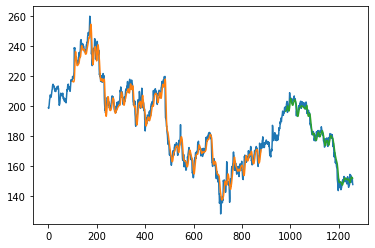

In [ ]:
#3. Plotar os resultados graficamente
#3.1 Plotando os dados da base de treinos
dias=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[dias:len(train_predict)+dias, :] = train_predict
#3.2 Plotando os dados da base de teste
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(dias*2)+1:len(df1)-1, :] = test_predict
#3.3 Plotando os dados da base original
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



#ETAPA III

Realizado o treinamento do modelo na etapa anterir, chegou a hora de efetivamente botarnos o modelo em prática na tentativa de prever o valor da cotação nos próximos dias.

## PREDIÇÃO DOS PRÓXIMOS DIAS

Na célula de código abaixo, iremos obter a informação de quantos dias estão sendo utilizados na base de validação.

In [ ]:
len(test_data)

378

Queremos considerar aqui apenas 100 dias da base de teste para análise afim de mantermos um período relativamente semelhante para a predição. Por isso que o parâmetro da primeira linha: test_data[X:] deve ser o valor acima menos 100 nesse caso.

In [ ]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

Para rodar a análise com o modelo treinado previamente, rodamos o código abaixo.
Na forma de comentários estão explicados os parâmetros a serem mudados a depender da análise.

In [ ]:
from numpy import array

lst_output=[]
n_steps=100 #número de dias que se quer considerar da base de treinamento, conforme célilas acima.
i=0
while(i<30): #número de dias que se pretende prever
    
    if(len(temp_input)>100): #verificar relação com o primeiro comentário desta célula
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17586184]
101
1 day input [0.38654183 0.38021009 0.38585674 0.40237497 0.40633326 0.40252721
 0.39651366 0.39148969 0.3893583  0.39285986 0.40298394 0.39933014
 0.38174621 0.39940626 0.38683946 0.36248763 0.34109766 0.35137322
 0.35662632 0.33280049 0.30714775 0.28842201 0.3011342  0.31095379
 0.29177133 0.27662328 0.2581259  0.26421557 0.27296948 0.26177971
 0.25272132 0.23742102 0.23353886 0.2253178  0.17561087 0.1622136
 0.15307909 0.14409683 0.11791124 0.17778032 0.16160463 0.15696125
 0.1520134  0.16434498 0.14683718 0.13199361 0.16038669 0.15878816
 0.13366827 0.12240237 0.12856817 0.13001446 0.13602725 0.14698942
 0.15262236 0.16244196 0.17081525 0.16274644 0.15855979 0.17340336
 0.16541067 0.1866484  0.18923651 0.17393621 0.16335541 0.16449722
 0.16921672 0.16738982 0.16799878 0.17698105 0.18131994 0.1760676
 0.15810307 0.16130014 0.15170891 0.16891223 0.18345132 0.18801857
 0.17195707 0.15703738 0.14143259 0.13458172 0.14714166 0.15345969
 0.14539088 0.1556672  0.19989343 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

1259

##COMPARAÇÃO COM O DATAFRAME INICIAL

Para conseguirmos plotar a previsão no mesmo gráfico do valor original será necessário retornamos a forma original e subtrair do valor acima o número de dias considerado (100). 

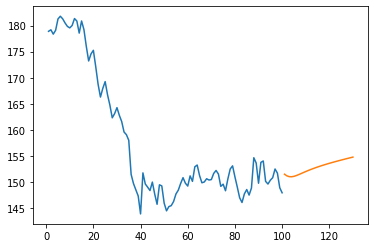

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

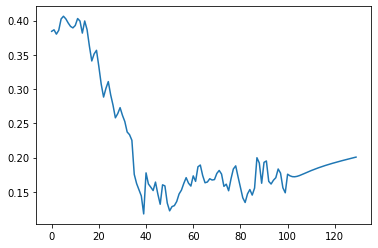

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1159:])

#EXTRA: PONTO DE SUPORTE

Além da previsão dos preços nos próximos dias, é muito interessante termos também uma ideia da previsão dos chamados pontos de suporte, ou seja, valores nos quais acima é interessante vender a ação para evitar uma perda expressiva e abaixo é interessante comprar para ganho na valorização. E para isso podemos usar um raciocinio semelhante ao acima. Afim de exemplificar a primeira opção de dataset, agora será utilizado a base de dados do site Yahoo finanças com o csv carregado diretamente ao colab.

In [ ]:
df = pd.read_csv('MMM2.csv')
df = df[['Date','Low']] #como queremos saber o mínimo para venda, usaremos aqui o menor valor de cada dia
df

,Date,Low
0,1962-01-02,4.125000
1,1962-01-03,4.085938
2,1962-01-04,4.187500
3,1962-01-05,4.062500
4,1962-01-08,4.031250
...,...,...
15197,2022-05-16,146.309998
15198,2022-05-17,150.520004
15199,2022-05-18,148.470001
15200,2022-05-19,144.110001


Correção da data

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1980-12-11')
datetime_object

datetime.datetime(1980, 12, 11, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0       1962-01-02
1       1962-01-03
2       1962-01-04
3       1962-01-05
4       1962-01-08
           ...    
15197   2022-05-16
15198   2022-05-17
15199   2022-05-18
15200   2022-05-19
15201   2022-05-20
Name: Date, Length: 15202, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Low
Date,
1962-01-02,4.125000
1962-01-03,4.085938
1962-01-04,4.187500
1962-01-05,4.062500
1962-01-08,4.031250
...,...
2022-05-16,146.309998
2022-05-17,150.520004
2022-05-18,148.470001


E interessante analisar esse valor graficamente. Pois nesse gráfico já percebemos alguns vales que representam minimas históricas da empresa.

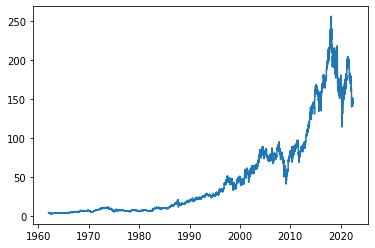

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Low'])

Abaixo estaremos transformando os dados numa matriz numpy, considerando aqui sempre 3 dias anteriores ao que se está sendo analisado.

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Low'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,187.009995,187.899994,188.080002,190.169998
1,2021-03-26,187.899994,188.080002,190.169998,192.210007
2,2021-03-29,188.080002,190.169998,192.210007,193.509995
3,2021-03-30,190.169998,192.210007,193.509995,193.880005
4,2021-03-31,192.210007,193.509995,193.880005,192.050003
...,...,...,...,...,...
247,2022-03-17,141.449997,142.589996,142.839996,144.149994
248,2022-03-18,142.589996,142.839996,144.149994,145.220001
249,2022-03-21,142.839996,144.149994,145.220001,147.399994
250,2022-03-22,144.149994,145.220001,147.399994,148.500000


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

Divisão dos dados em treino, validação e teste.

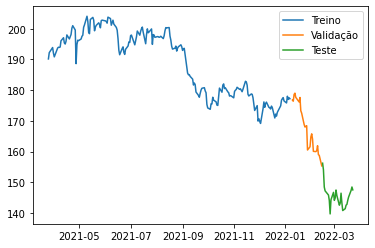

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Treino', 'Validação', 'Teste'])

Abaixo estaremos rodando um novo modelo sem a interferência dos dados do modelo anterior. Aqui, o código foi simplificado e consequentemente se tornou menos assertivo mas mais rápido, por isso estamos utilizando 100 epochs.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 86ms/step - loss: 35762.8359 - mean_absolute_error: 188.8273 - val_loss: 28024.9297 - val_mean_absolute_error: 167.2440
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 35490.6172 - mean_absolute_error: 188.1057 - val_loss: 27768.1055 - val_mean_absolute_error: 166.4744
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 35190.1797 - mean_absolute_error: 187.3042 - val_loss: 27460.1348 - val_mean_absolute_error: 165.5467
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 34806.1641 - mean_absolute_error: 186.2774 - val_loss: 27064.4043 - val_mean_absolute_error: 164.3472
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 34310.9961 - mean_absolute_error: 184.9452 - val_loss: 26550.5098 - val_mean_absolute_error: 162.7762
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 33669.7969 - mean_absolute_error: 183.2006 - val_loss: 25889.54

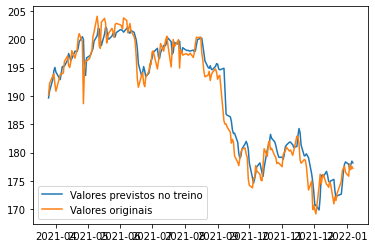

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Valores previstos no treino', 'Valores originais'])

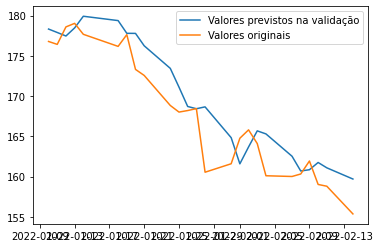

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Valores previstos na validação', 'Valores originais'])

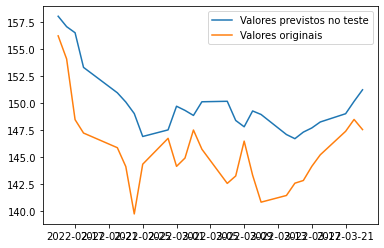

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Valores previstos no teste', 'Valores originais'])

Afim de facilitar a visualização, abaixo está plotado apenas o valor previsto no teste e os dados originais.

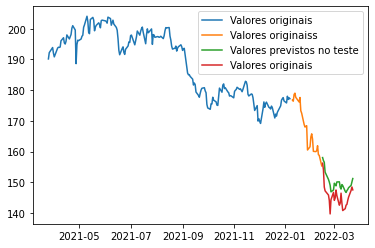

In [ ]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Valores originais',
            'Valores originaiss',
            'Valores previstos no teste', 
            'Valores originais'])

A partir da análise do gráfico acima percebemos que na eventualidade da cotação estar abaixo da linha "Valores previstos no teste" é interessante realizar a compra e muito acima disso realizar a venda, já que pela média histórica do preço dela o preço tenderá a ficar próximo deste valor.